In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

In [11]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/leukemia_dataset.csv")
df.head(5)

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


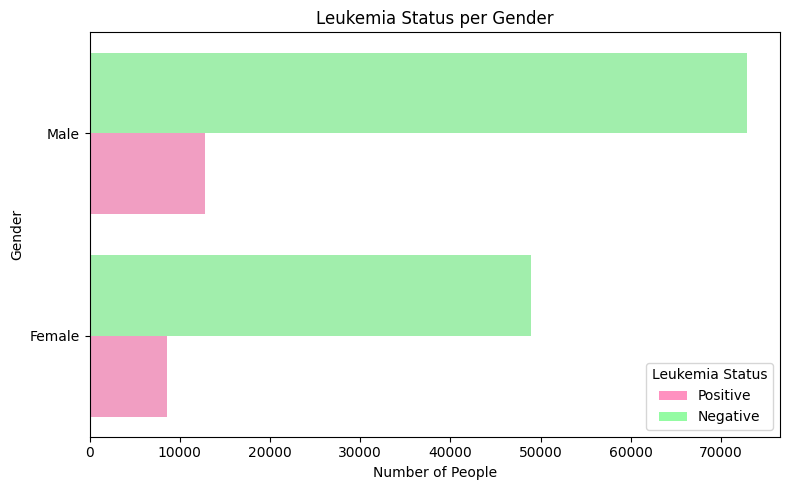

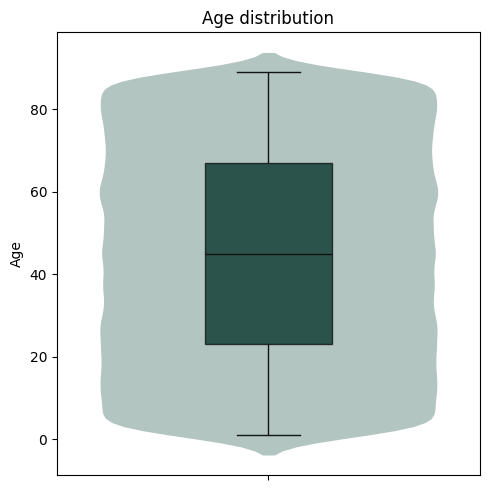

In [12]:
# Leggi il datase
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df['Leukemia_Status'] = df['Leukemia_Status'].str.strip().str.capitalize()
df['Gender'] = df['Gender'].str.strip().str.capitalize()

plt.figure(figsize=(8,5))

# Palette con alpha
palette = {
    "Positive": (255/255, 0/255, 111/255, 0.6),
    "Negative": (7/255, 247/255, 43/255, 0.6)
}

# Countplot con barre affiancate
ax = sns.countplot(
    data=df,
    y="Gender",
    hue="Leukemia_Status",
    dodge=True,
    palette=palette
)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

# Legenda personalizzata
handles = [
    Patch(facecolor=(255/255, 0/255, 111/255, 0.43), label="Positive"),
    Patch(facecolor=(7/255, 247/255, 43/255, 0.43), label="Negative")
]
ax.legend(handles=handles, title="Leukemia Status")

plt.xlabel("Number of People")
plt.ylabel("Gender")
plt.title("Leukemia Status per Gender")

plt.tight_layout()
plt.show()

col = "Age"
color = '#014034'

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

vp = sns.violinplot(data=df[col], color=color,
                    inner=None, linewidth=0, saturation=1, ax=ax)

for patch in vp.collections:
    patch.set_alpha(0.3)  

bp = sns.boxplot(data=df[col], color=color, width=0.3,
                    boxprops={'zorder': 2}, saturation=0.7, ax=ax)

for patch in bp.patches:
    patch.set_alpha(0.8)

ax.set_ylabel('')   

plt.title('Age distribution')
plt.ylabel('Age')
plt.tight_layout()
#plt.savefig(f"../outputs/brain_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


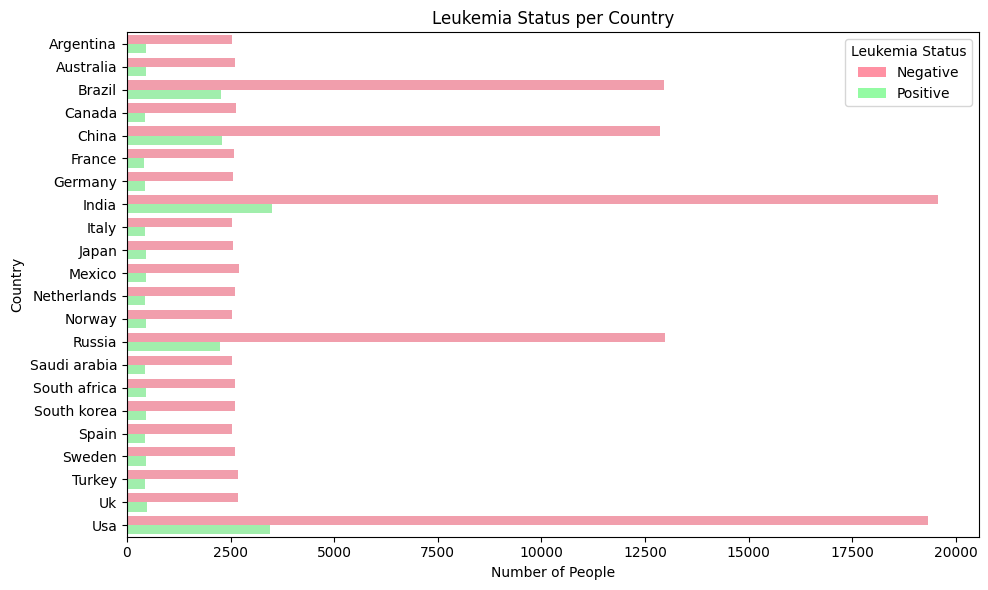

In [13]:

# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df["Leukemia_Status"] = df["Leukemia_Status"].str.strip().str.capitalize()
df["Country"] = df["Country"].str.strip().str.capitalize()

# Calcolo conteggi assoluti per Country + Leukemia_Status
count_df = (
    df.groupby(["Country", "Leukemia_Status"])
      .size()
      .reset_index(name="Count")
)

plt.figure(figsize=(10,6))

# Definisci la palette con i colori desiderati
palette = {
    "Negative": (1, 0, 43/255, 0.43),   # rosso con alpha
    "Positive": (7/255, 247/255, 43/255, 0.43)  # verde con alpha
}

# Barplot orizzontale con conteggi assoluti e palette
ax = sns.barplot(
    data=count_df,
    y="Country",
    x="Count",
    hue="Leukemia_Status",
    dodge=True,
    palette=palette
)

# Imposta alpha sulle barre (già incluso nella palette)
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

# Legenda personalizzata
handles = [
    Patch(facecolor=(1, 0, 43/255, 0.43), label="Negative"),
    Patch(facecolor=(7/255, 247/255, 43/255, 0.43), label="Positive")
]
ax.legend(handles=handles, title="Leukemia Status", loc='upper right')

plt.xlabel("Number of People")
plt.ylabel("Country")
plt.title("Leukemia Status per Country")
plt.tight_layout()
plt.show()



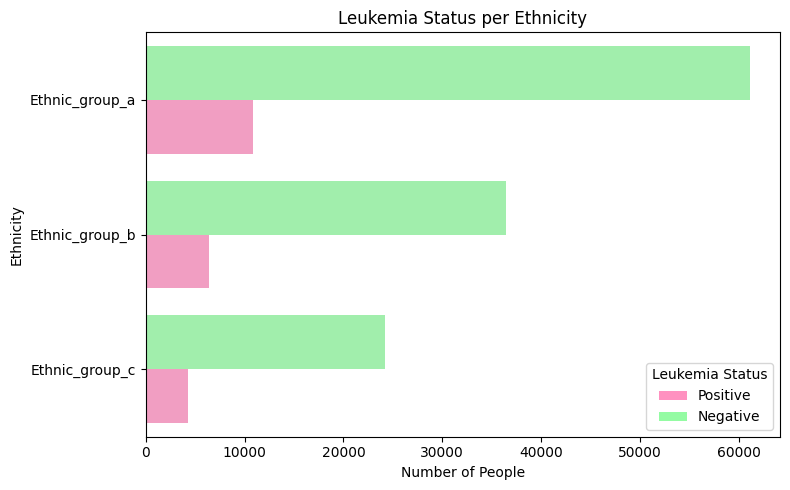

In [14]:


# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df['Leukemia_Status'] = df['Leukemia_Status'].str.strip().str.capitalize()
df['Ethnicity'] = df['Ethnicity'].str.strip().str.capitalize()

plt.figure(figsize=(8,5))

# Ordine desiderato
ethnicity_order = ["Ethnic_group_a", "Ethnic_group_b", "Ethnic_group_c"]

# Palette con alpha
palette = {
    "Positive": (255/255, 0/255, 111/255, 0.43),
    "Negative": (7/255, 247/255, 43/255, 0.43)
}

# Countplot con barre affiancate e ordine personalizzato
ax = sns.countplot(
    data=df,
    y="Ethnicity",
    hue="Leukemia_Status",
    dodge=True,
    palette=palette,
    order=ethnicity_order
)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

# Legenda personalizzata
handles = [
    Patch(facecolor=(255/255, 0/255, 111/255, 0.43), label="Positive"),
    Patch(facecolor=(7/255, 247/255, 43/255, 0.43), label="Negative")
]
ax.legend(handles=handles, title="Leukemia Status")

plt.xlabel("Number of People")
plt.ylabel("Ethnicity")
plt.title("Leukemia Status per Ethnicity")

plt.tight_layout()
plt.show()


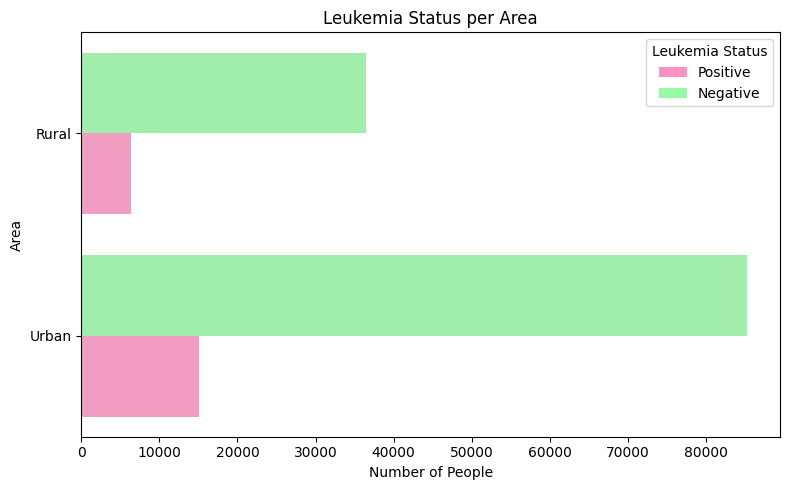

In [15]:


# Leggi il datase
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df['Leukemia_Status'] = df['Leukemia_Status'].str.strip().str.capitalize()
df['Urban_Rural'] = df['Urban_Rural'].str.strip().str.capitalize()

plt.figure(figsize=(8,5))

# Palette con alpha
palette = {
    "Positive": (255/255, 0/255, 111/255, 0.6),
    "Negative": (7/255, 247/255, 43/255, 0.6)
}

# Countplot con barre affiancate
ax = sns.countplot(
    data=df,
    y="Urban_Rural",
    hue="Leukemia_Status",
    dodge=True,
    palette=palette
)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

# Legenda personalizzata
handles = [
    Patch(facecolor=(255/255, 0/255, 111/255, 0.43), label="Positive"),
    Patch(facecolor=(7/255, 247/255, 43/255, 0.43), label="Negative")
]
ax.legend(handles=handles, title="Leukemia Status")

plt.xlabel("Number of People")
plt.ylabel("Area")
plt.title("Leukemia Status per Area")

plt.tight_layout()
plt.show()







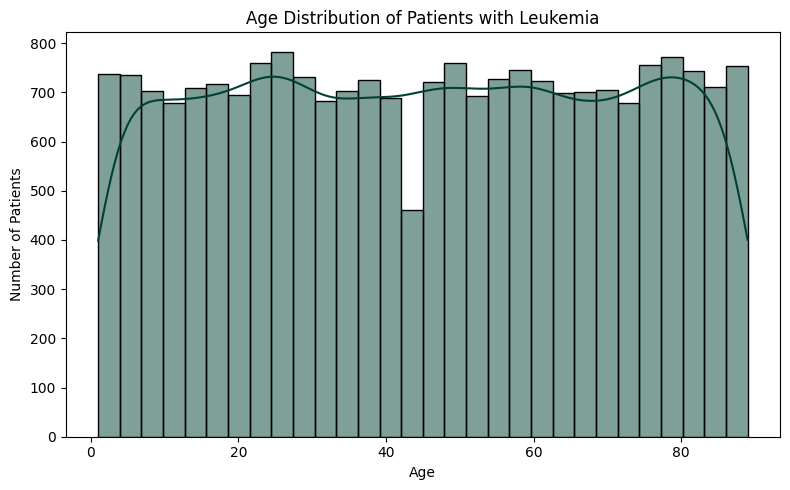

In [16]:
# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Filtra solo i pazienti con leucemia
df_positive = df[df["Leukemia_Status"].str.strip().str.capitalize() == "Positive"]

# Colore
colors = (1/255, 64/255, 52/255)

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df_positive["Age"], bins=30, kde=True, color=colors)
plt.title("Age Distribution of Patients with Leukemia")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()



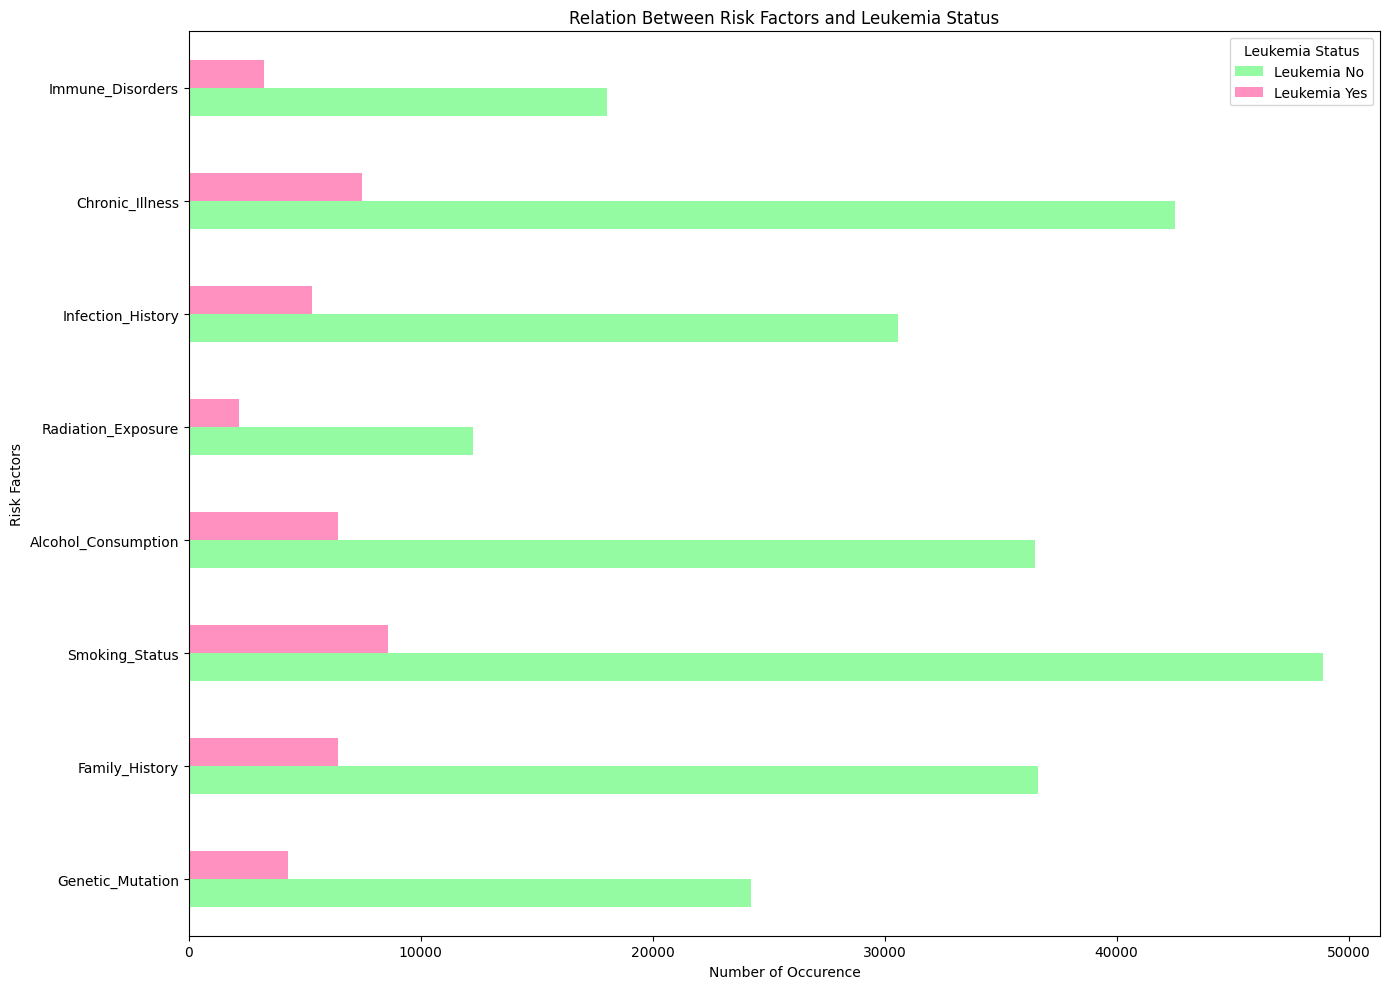

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Selezioniamo le colonne di interesse
cols = [
    "Genetic_Mutation", "Family_History", "Smoking_Status", "Alcohol_Consumption",
    "Radiation_Exposure", "Infection_History", "Chronic_Illness", "Immune_Disorders"
]

# Normalizza valori Yes/No
for c in cols:
    df[c] = df[c].astype(str).str.strip().str.capitalize()

df["Leukemia_Status"] = df["Leukemia_Status"].str.strip().str.capitalize()

# Calcolo dei conteggi assoluti di "Yes" per ogni feature e stato
summary_counts = {}
for c in cols:
    temp = df.groupby("Leukemia_Status")[c].value_counts().unstack().fillna(0)
    if "Yes" in temp.columns:
        summary_counts[c] = temp.loc[:, "Yes"]
    elif "Present" in temp.columns:
        summary_counts[c] = temp.loc[:, "Present"]
    else:
        summary_counts[c] = temp.iloc[:, 0]

summary_df = pd.DataFrame(summary_counts).T
summary_df.columns = ["Leukemia No", "Leukemia Yes"]

# Palette colori
colors = [(7/255, 247/255, 43/255), (255/255, 0/255, 111/255)]  # Verde, Rosso

# Plot
ax = summary_df.plot(
    kind="barh",
    figsize=(14, 10),
    color=colors
)

# Imposta alpha
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

plt.xlabel("Number of Occurence")
plt.ylabel("Risk Factors")
plt.title("Relation Between Risk Factors and Leukemia Status")
plt.legend(title="Leukemia Status")
plt.tight_layout()
plt.show()







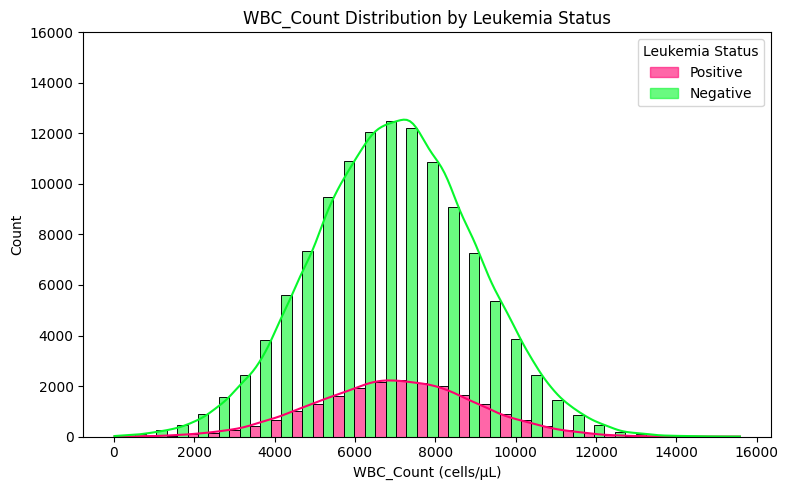

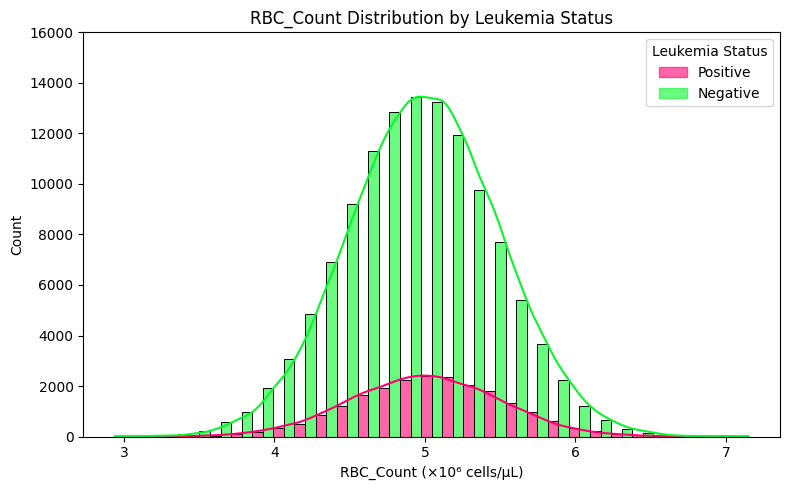

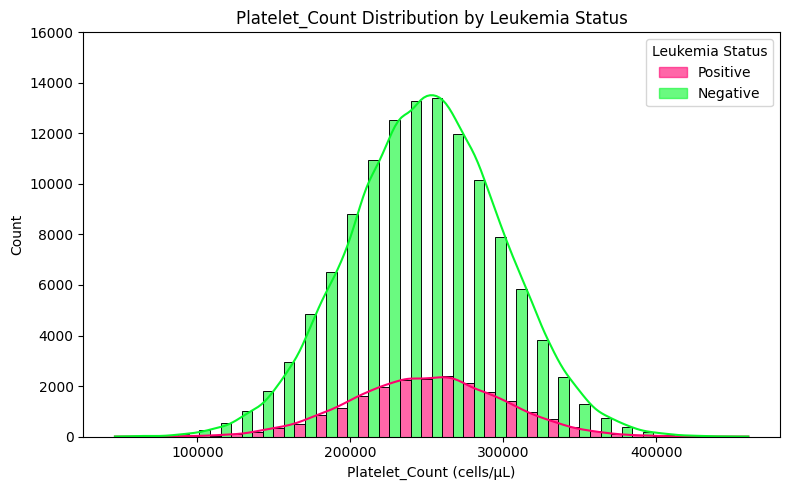

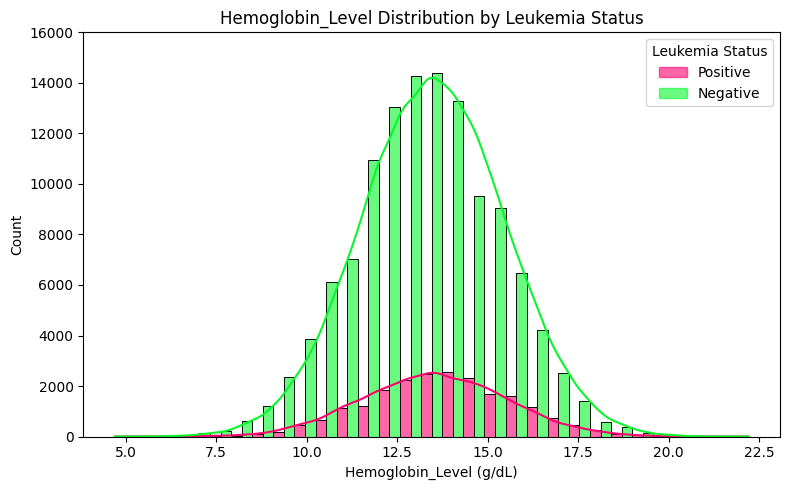

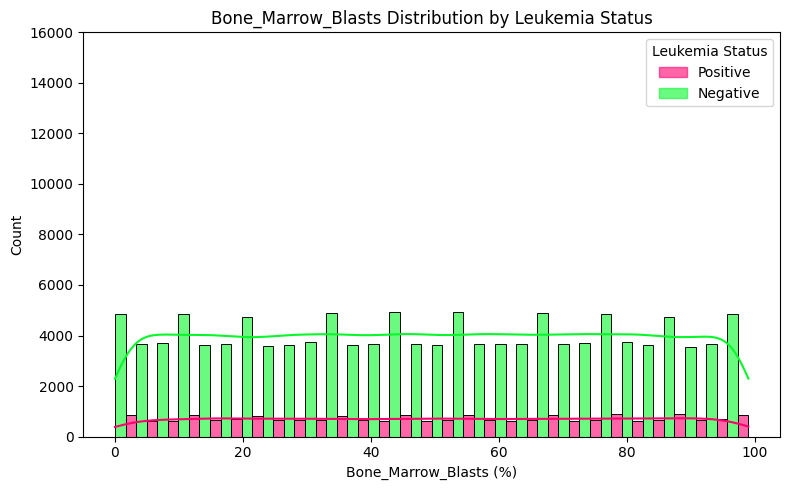

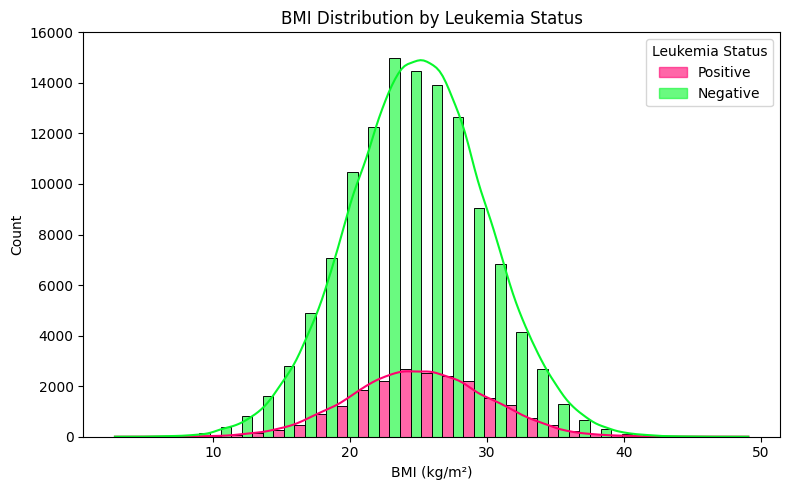

In [18]:
df = pd.read_csv("../data/leukemia_dataset.csv")

numeric_cols = ["WBC_Count", "RBC_Count", "Platelet_Count", "Hemoglobin_Level", "Bone_Marrow_Blasts","BMI"]

# Unità di misura dedotte dal dataset
units = {
    "WBC_Count": "cells/µL",
    "RBC_Count": "×10⁶ cells/µL",
    "Platelet_Count": "cells/µL",
    "Hemoglobin_Level": "g/dL",
    "Bone_Marrow_Blasts": "%",
    "BMI": "kg/m²"
}

for col in numeric_cols:
    plt.figure(figsize=(8,5))

    # Per WBC_Count rimuoviamo valori negativi
    if col == "WBC_Count":
        data_to_plot = df[df["WBC_Count"] >= 0]
    else:
        data_to_plot = df

    sns.histplot(
        data=data_to_plot,
        x=col,
        hue="Leukemia_Status",
        bins=30,
        palette={
            "Positive": (255/255, 0/255, 111/255, 0.6),
            "Negative": (7/255, 247/255, 43/255, 0.6)
        },
        multiple="dodge",
        alpha=0.6,
        kde=True
    )
    
    plt.title(f"{col} Distribution by Leukemia Status")

    # Asse X con unità di misura
    plt.xlabel(f"{col} ({units[col]})")

    plt.ylabel("Count")

    # Limite Y richiesto
    plt.ylim(0, 16000)

    # Legenda manuale
    handles = [
        Patch(color=(255/255, 0/255, 111/255, 0.6), label='Positive'),
        Patch(color=(7/255, 247/255, 43/255, 0.6), label='Negative')
    ]
    plt.legend(handles=handles, title="Leukemia Status", loc='upper right')
    
    plt.tight_layout()
    plt.show()





